In [13]:
import pandas as pd
import plotly.graph_objects as go
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime
import numpy as np
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
%%sql
SELECT 
    data, produto, unidade, maximo, mais_frequente, minimo 
FROM divtec_cotacao 
ORDER BY data, produto;

,data,produto,unidade,maximo,mais_frequente,minimo
0,2023-01-03,00101-ABACATE,KG,9.00,5.55,3.89
1,2023-01-03,00201-ABACAXI CAIENA (HAWAI),UND,5.50,5.00,4.00
2,2023-01-03,00202-ABACAXI PEROLA,UND,5.00,4.00,3.00
3,2023-01-03,00203-ABACAXI TERRA DE AREIA,UND,3.75,3.00,1.50
4,2023-01-03,00301-AMEIXA NACIONAL,KG,10.00,7.00,5.00
...,...,...,...,...,...,...
45622,2024-09-02,54901-ROSA COLORIDA 20UN,MOL,60.00,60.00,60.00
45623,2024-09-02,54950-ROSA IMPORTADA,MOL,0.00,0.00,0.00
45624,2024-09-02,FOLHAGENS VARIADAS,UND,30.00,20.00,20.00
45625,2024-09-02,MANGOSTÃO,KG,50.00,50.00,50.00


In [4]:
produto = '00501-BANANA CATURRA / NANICA'
cotacao = df_cotacao.copy(deep=True)
cotacao = cotacao.loc[cotacao['produto'] == produto]
cotacao['data'] = cotacao['data'].astype('datetime64[ns]')
cotacao.head(2)

,data,produto,unidade,maximo,mais_frequente,minimo
7,2023-01-03,00501-BANANA CATURRA / NANICA,KG,4.50,3.33,2.00
213,2023-01-05,00501-BANANA CATURRA / NANICA,KG,4.00,2.78,1.75


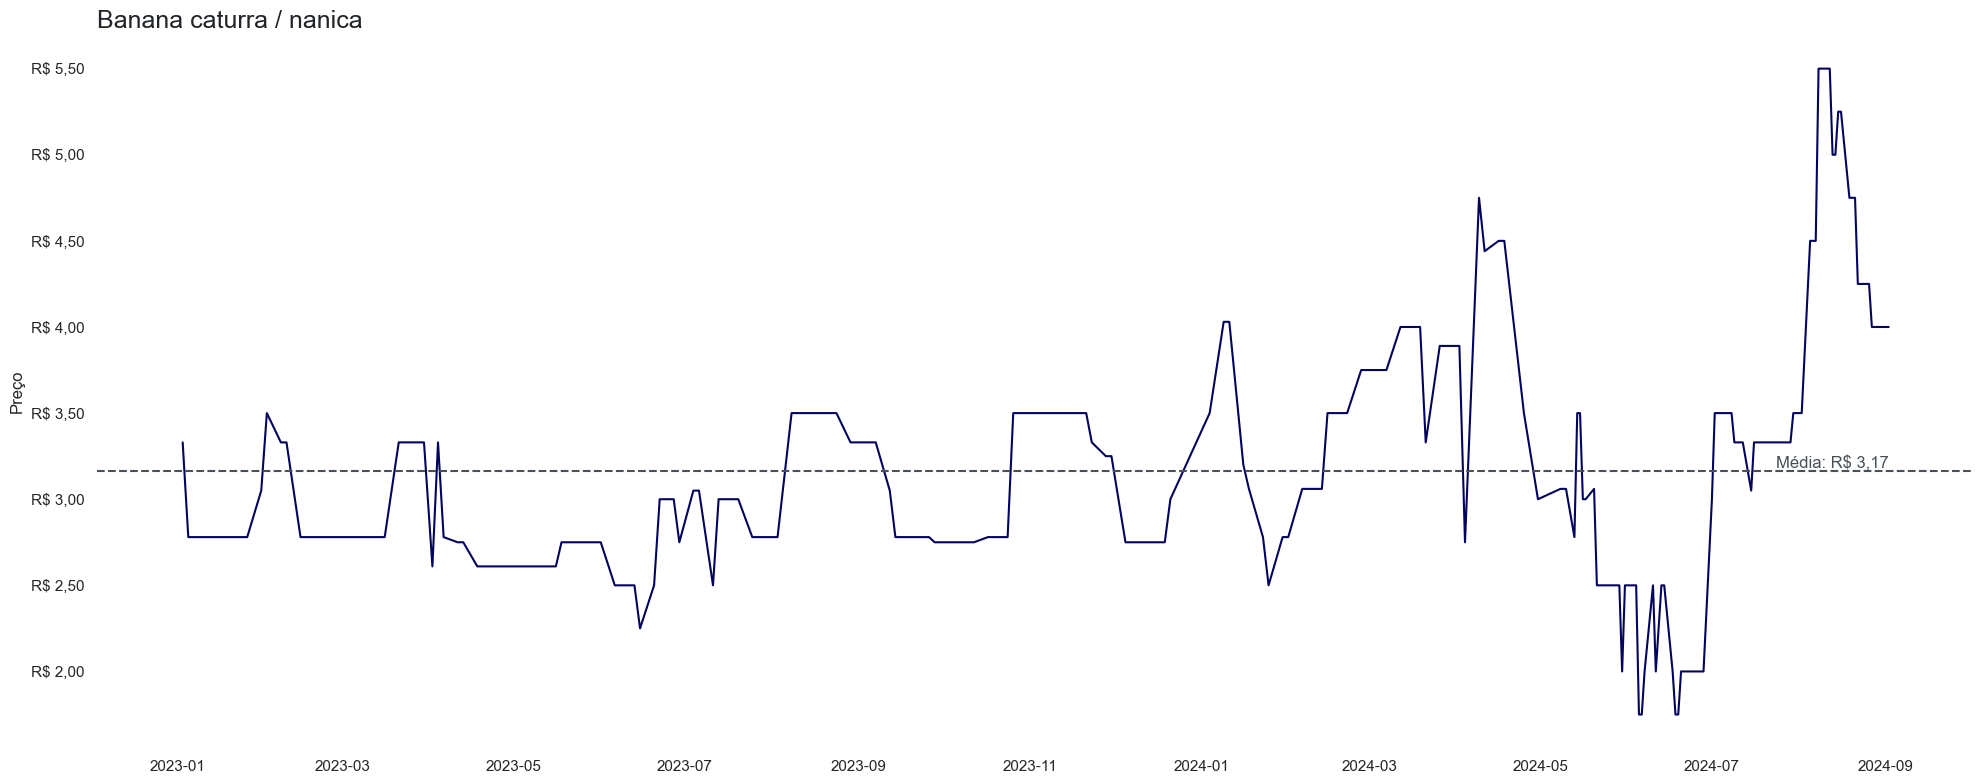

In [33]:
def format_decimal(x, pos):
	return f'R$ {x:.2f}'.replace('.', ',')

# Gráfico
sns.set_theme(style="white")
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=cotacao, x='data', y='mais_frequente', label=f'{(produto[6:]).capitalize()}', color='#03045e')

# Personalização
mean_value = cotacao['mais_frequente'].mean()
ax.axhline(mean_value, color='#495057', linestyle='--')

# Adicionando texto acima da linha de média
ax.text(cotacao['data'].iloc[-1], mean_value + 0.02, f'Média: R$ {mean_value:.2f}'.replace('.', ','),
		color='#495057', fontsize=12, ha='right')

plt.title(f"{(produto[6:]).capitalize()}", fontsize=18, loc='left', color='#212529')
plt.xlabel("")
plt.ylabel("Preço")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_decimal))
ax.legend_.remove()

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.show()